# Introduction

In the heat of a Formula E race, teams need fast access to insights that can help drivers make split-second decisions and cross the finish line first. Can your data-science skills help Envision Racing, one of the founding teams in the championship, take home even more trophies?

To do so, you will have to build a machine learning model that predicts the Envision Racing drivers’ lap times for the all-important qualifying sessions that determine what position they start the race in. Winning races involves a combination of both a driver’s skills and data analytics. To help the team you’ll need to consider several factors that affect performance during a session, including weather, track conditions, and a driver’s familiarity with the track.

Genpact, a leading professional services firm that focuses on digital transformation, is collaborating with Envision Racing, a Formula E racing team and digital hackathon platform MachineHack, a brainchild of Analytics India Magazine, is launching ‘Dare in Reality’.’ This two-week hackathon allows data science professionals, machine learning engineers, artificial intelligence practitioners, and other tech enthusiasts to showcase their skills, impress the judges, and stand a chance to win exciting cash prizes.

Genpact (NYSE: G) is a global professional services firm that makes business transformation real, driving digital-led innovation and digitally enabled intelligent operations for our clients.

| Feature | Description Provided |
|---|---|
| NUMBER | Number in sequence |
| DRIVER_NUMBER | Driver number |
| LAP_NUMBER | Lap number |
| LAP_TIME | Lap time in seconds |
| LAP_IMPROVEMENT | Number of Lap Improvement |
| CROSSING_FINISH_LINE_IN_PIT | Time |
| S1 | Sector 1 in [min sec.microseconds] |
| S1_IMPROVEMENT | Improvement in sector 1 |
| S2 | Sector 2 in [min sec.microseconds] |
| S2_IMPROVEMENT | Improvement in sector 2 |
| S3 | Sector 3 in [min sec.microseconds] |
| S3_IMPROVEMENT | Improvement in sector 3 |
| KPH | Speed in kilometer/hour |
| ELAPSED | Time elapsed in [min sec.microseconds] |
| HOUR | In [min sec.microseconds] |
| S1_LARGE | In [min sec.microseconds] |
| S2_LARGE | In [min sec.microseconds] |
| S3_LARGE | In [min sec.microseconds] |
| DRIVER_NAME | Name of the driver |
| PIT_TIME | Time taken to car stops in the pits for fuel and other consumables to be renewed or replenished |
| GROUP | Group of driver |
| TEAM | Team name |
| POWER | Brake Horsepower(bhp) |
| LOCATION | Location of the event |
| EVENT | Free practice or qualifying |

- train.csv - 10276 rows x 25 columns (Includes target column as LAP_TIME).
- test.csv - 420 rows x 25 columns(Includes target column as LAP_TIME).
- (submission.csv) Please check the Evaluation section for more details on how to generate a valid submission.
- The challenge is to predict the LAP_TIME for the qualifying groups of location 6, 7 and 8.

**The submission will be evaluated using the RMSLE metric.\
One can use numpy.sqrt(mean_squared_log_error(actual, predicted)) to calculate the same**

# Importing packages and data, basic cleaning & overview of data

## Importing packages

**Downloading ML Helper :**

In [1]:
# Downloading a package from github : https://github.com/karthikchiru12/ML_Helper
! git clone https://github.com/karthikchiru12/ML_Helper.git

Cloning into 'ML_Helper'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 42 (delta 14), reused 34 (delta 9), pack-reused 0
Unpacking objects: 100% (42/42), 7.99 KiB | 194.00 KiB/s, done.


**Importing packages :**

In [1]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV

In [5]:
import xgboost as xgb

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras import Model,Sequential
from tensorflow.keras import backend as K

In [7]:
from pycaret.regression import *

In [7]:
from ML_Helper.Analysis.eda import EDA
from ML_Helper.Encoding.featurize import Featurizer

In [6]:
from Spaghetti import utils

In [ ]:
# Run this cell to view code for EDA function
?? EDA

In [ ]:
# Run this cell to view code for Featurizer function
?? Featurizer

In [ ]:
# Run this cell to view code for utils functions inside the folder
?? utils

## Importing data

**Files under Data folder :**

In [8]:
os.listdir('Data/')

['test.csv',
 'train.csv',
 'train_weather.csv',
 'test_weather.csv',
 'Data_DIR_2021.zip',
 'submission.csv']

**Importing each file :**

In [8]:
if not os.path.isfile('Cleaned_data/cleaned_train.csv'):
    train_data = pd.read_csv('Data/train.csv')
else:
    cleaned_train_data = pd.read_csv('Cleaned_data/cleaned_train.csv')

In [9]:
if not os.path.isfile('Cleaned_data/cleaned_test.csv'):
    test_data = pd.read_csv('Data/test.csv')
    #test_data['LAP_TIME'] = 0
else:
    cleaned_test_data = pd.read_csv('Cleaned_data/cleaned_test.csv')

In [10]:
if not os.path.isfile('Cleaned_data/cleaned_train_weather.csv'):
    train_weather_data = pd.read_csv('Data/train_weather.csv')
else:
    cleaned_train_weather_data = pd.read_csv('Cleaned_data/cleaned_train_weather.csv')

In [11]:
if not os.path.isfile('Cleaned_data/cleaned_test_weather.csv'):
    test_weather_data = pd.read_csv('Data/test_weather.csv')
else:
    cleaned_test_weather_data = pd.read_csv('Cleaned_data/cleaned_test_weather.csv')

In [12]:
sample_submission = pd.read_csv('Data/submission.csv')

**Spending that 70% of time cleaning this data :**

In [14]:
if not os.path.isfile('Cleaned_data/'):
    path = os.getcwd()
    # Creating a new directory 'data'
    os.mkdir(path+'/Cleaned_data')
    print("train")
    utils.clean_data(train_data,'cleaned_train.csv')
    print("test")
    utils.clean_data(test_data,'cleaned_test.csv')
    print("train_weather")
    utils.clean_weather_data(train_weather_data,'cleaned_train_weather.csv')
    print("test_weather")
    utils.clean_weather_data(test_weather_data,'cleaned_test_weather.csv')

train
CROSSING_FINISH_LINE_IN_PIT : FIXED
S1                          : FIXED
S2                          : FIXED
S3                          : FIXED
KPH                         : FIXED
ELAPSED                     : FIXED
HOUR                        : FIXED
S1 Large                    : FIXED
S2 Large                    : FIXED
S3 Large                    : FIXED
PIT_TIME                    : FIXED
GROUP                       : FIXED
POWER                       : FIXED

DONE : If the code works, dont touch it.

test
CROSSING_FINISH_LINE_IN_PIT : FIXED
S1                          : FIXED
S2                          : FIXED
S3                          : FIXED
KPH                         : FIXED
ELAPSED                     : FIXED
HOUR                        : FIXED
S1 Large                    : FIXED
S2 Large                    : FIXED
S3 Large                    : FIXED
PIT_TIME                    : FIXED
GROUP                       : FIXED
POWER                       : FIXED

DONE : If

In [ ]:
# To startover the data cleaning, delete the Cleaned_data directory and rerun above cells
!rm -r Cleaned_data

In [13]:
os.listdir('Cleaned_data/')

['cleaned_train_weather.csv',
 'cleaned_train.csv',
 'cleaned_test.csv',
 'cleaned_test_weather.csv']

## High level overview of data

### Train data : At glance

In [14]:
cleaned_train_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Columns: 49 entries, NUMBER to PIT_TOTAL
dtypes: float64(18), int64(17), object(14)
memory usage: 3.8+ MB


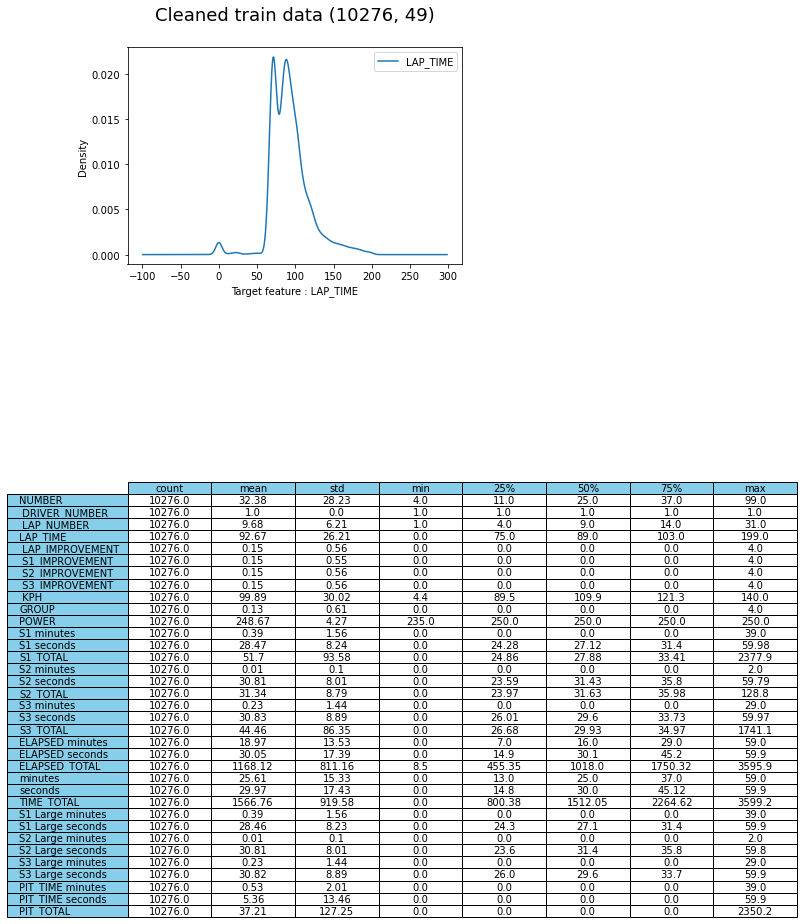

In [15]:
utils.plot_dataset_description_with_target_distribution(cleaned_train_data,"LAP_TIME",
                                                        title="Cleaned train data")  

In [ ]:
utils.plot_missing_values_per_feature(cleaned_train_data,title="Cleaned train data")

### Test data : At glance

In [16]:
cleaned_test_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Columns: 49 entries, NUMBER to PIT_TOTAL
dtypes: float64(19), int64(16), object(14)
memory usage: 160.9+ KB


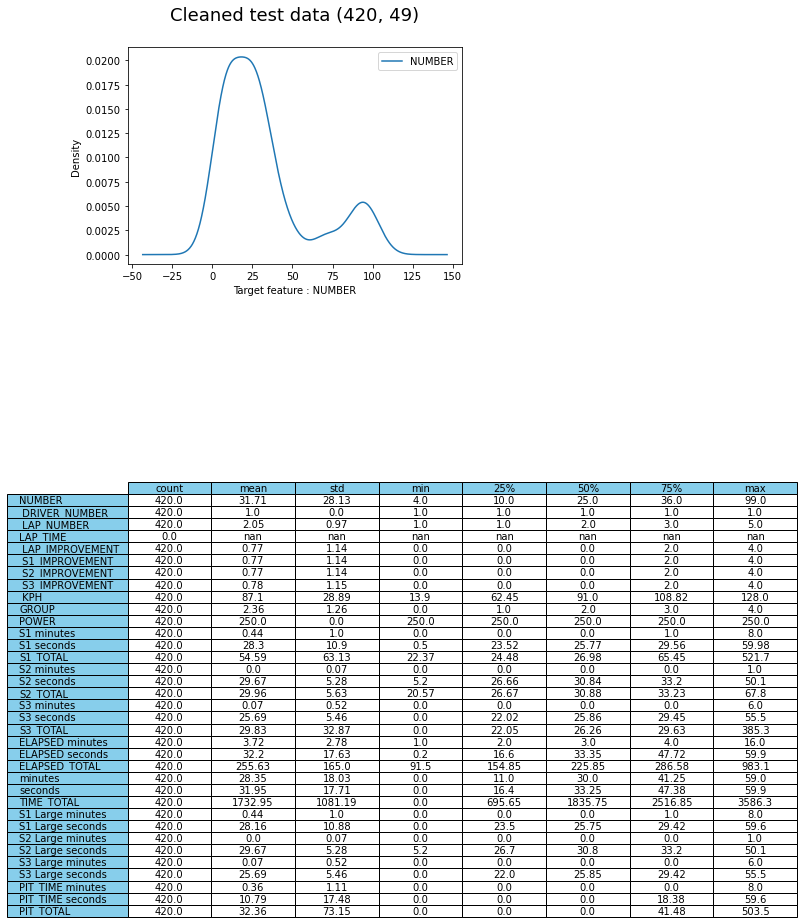

In [17]:
utils.plot_dataset_description_with_target_distribution(cleaned_test_data,"NUMBER",
                                                  title="Cleaned test data")  

In [ ]:
utils.plot_missing_values_per_feature(cleaned_test_data,title="Cleaned test data")

### Train weather data : At glance

In [18]:
cleaned_train_weather_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Columns: 11 entries, TIME_UTC_SECONDS to EVENT
dtypes: float64(5), int64(3), object(3)
memory usage: 78.7+ KB


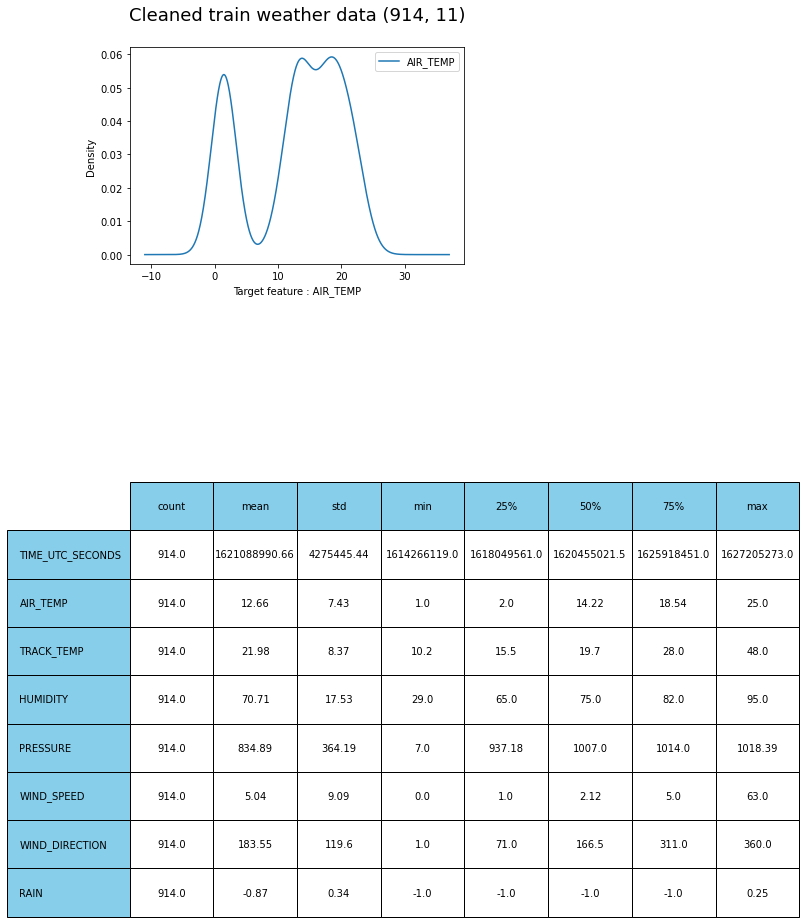

In [19]:
utils.plot_dataset_description_with_target_distribution(cleaned_train_weather_data
                                                        ,"AIR_TEMP",title="Cleaned train weather data")  

### Test weather data : At glance

In [20]:
cleaned_test_weather_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 11 entries, TIME_UTC_SECONDS to EVENTS
dtypes: int64(8), object(3)
memory usage: 14.5+ KB


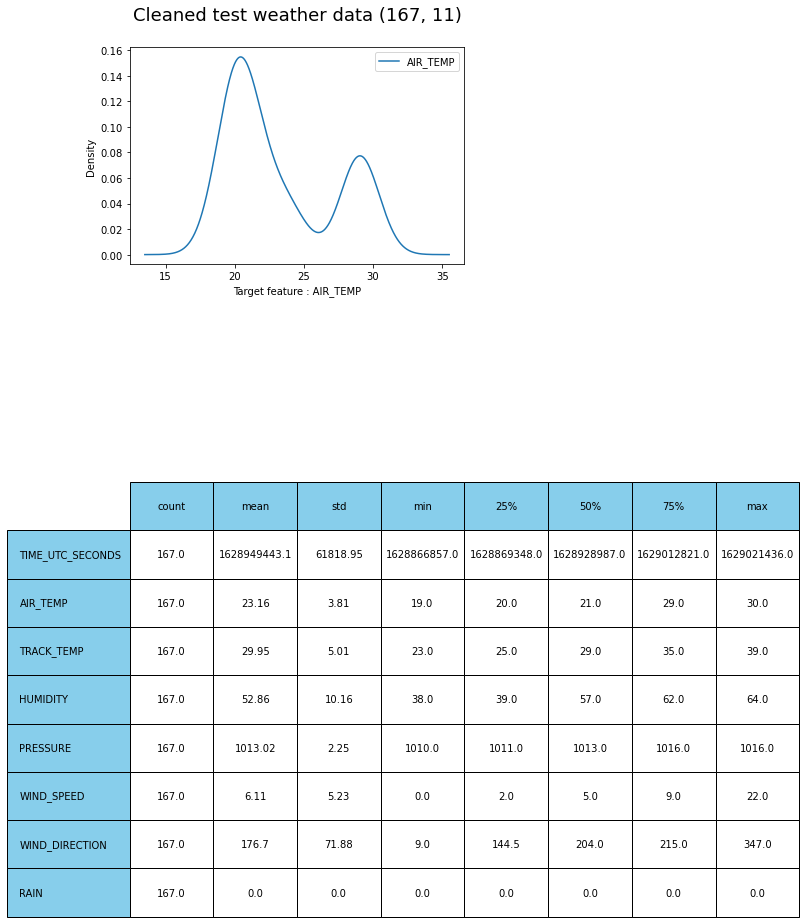

In [21]:
utils.plot_dataset_description_with_target_distribution(cleaned_test_weather_data
                                                        ,"AIR_TEMP",title="Cleaned test weather data")  

# Exploratory data analysis

## Exploring the train data

**Initializng the object :**

In [23]:
eda = EDA(cleaned_train_data)

### Univariate Analysis (Numerical Features)

**Plain distributions of numerical features :**

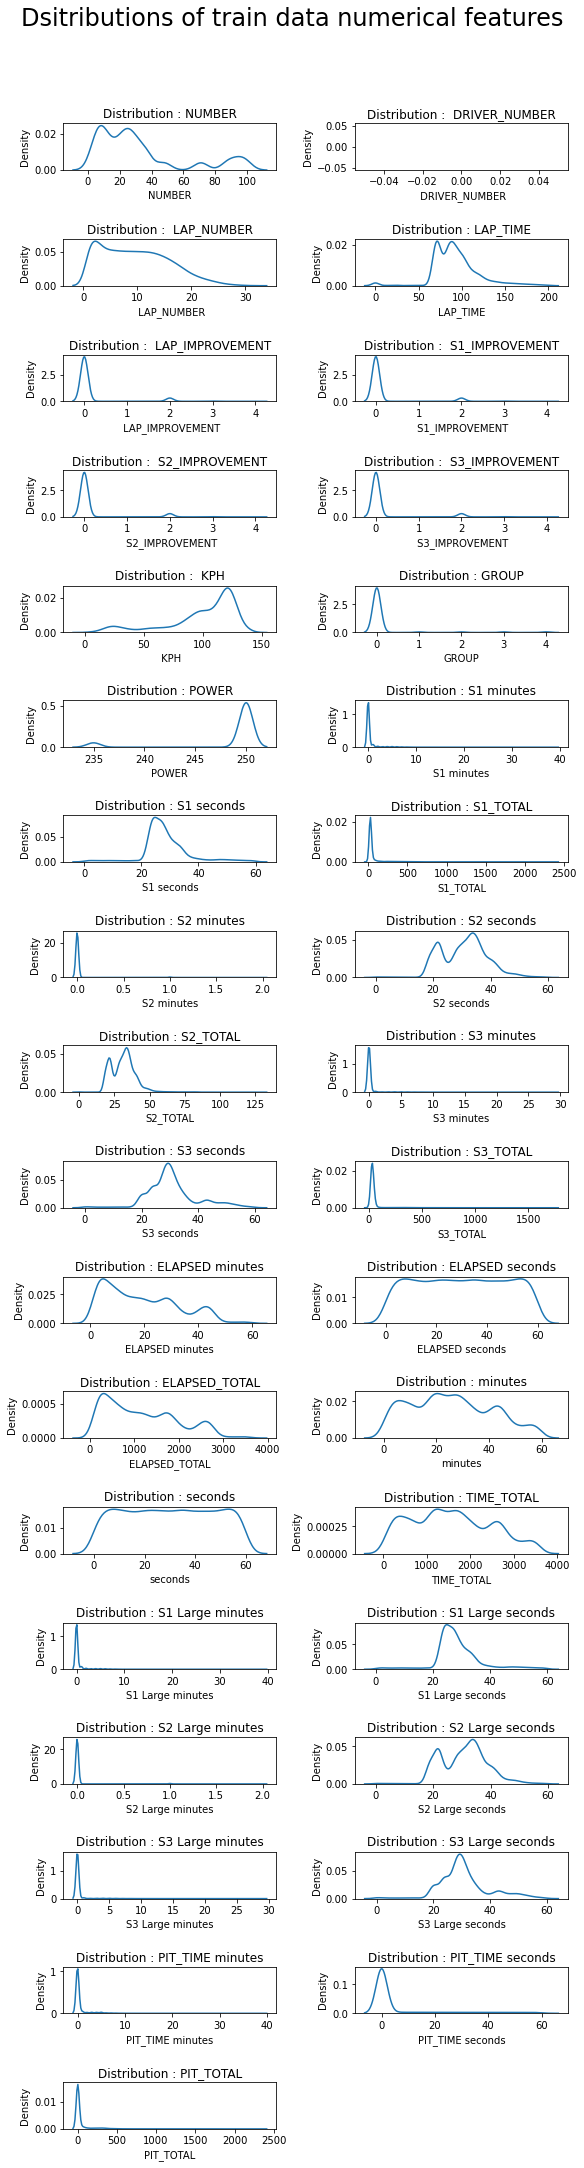

In [24]:
eda.kde_plot(list(cleaned_train_data.describe().columns),width=8,height=30,
             title="Dsitributions of train data numerical features")

**Distributions of numerical features by event :**

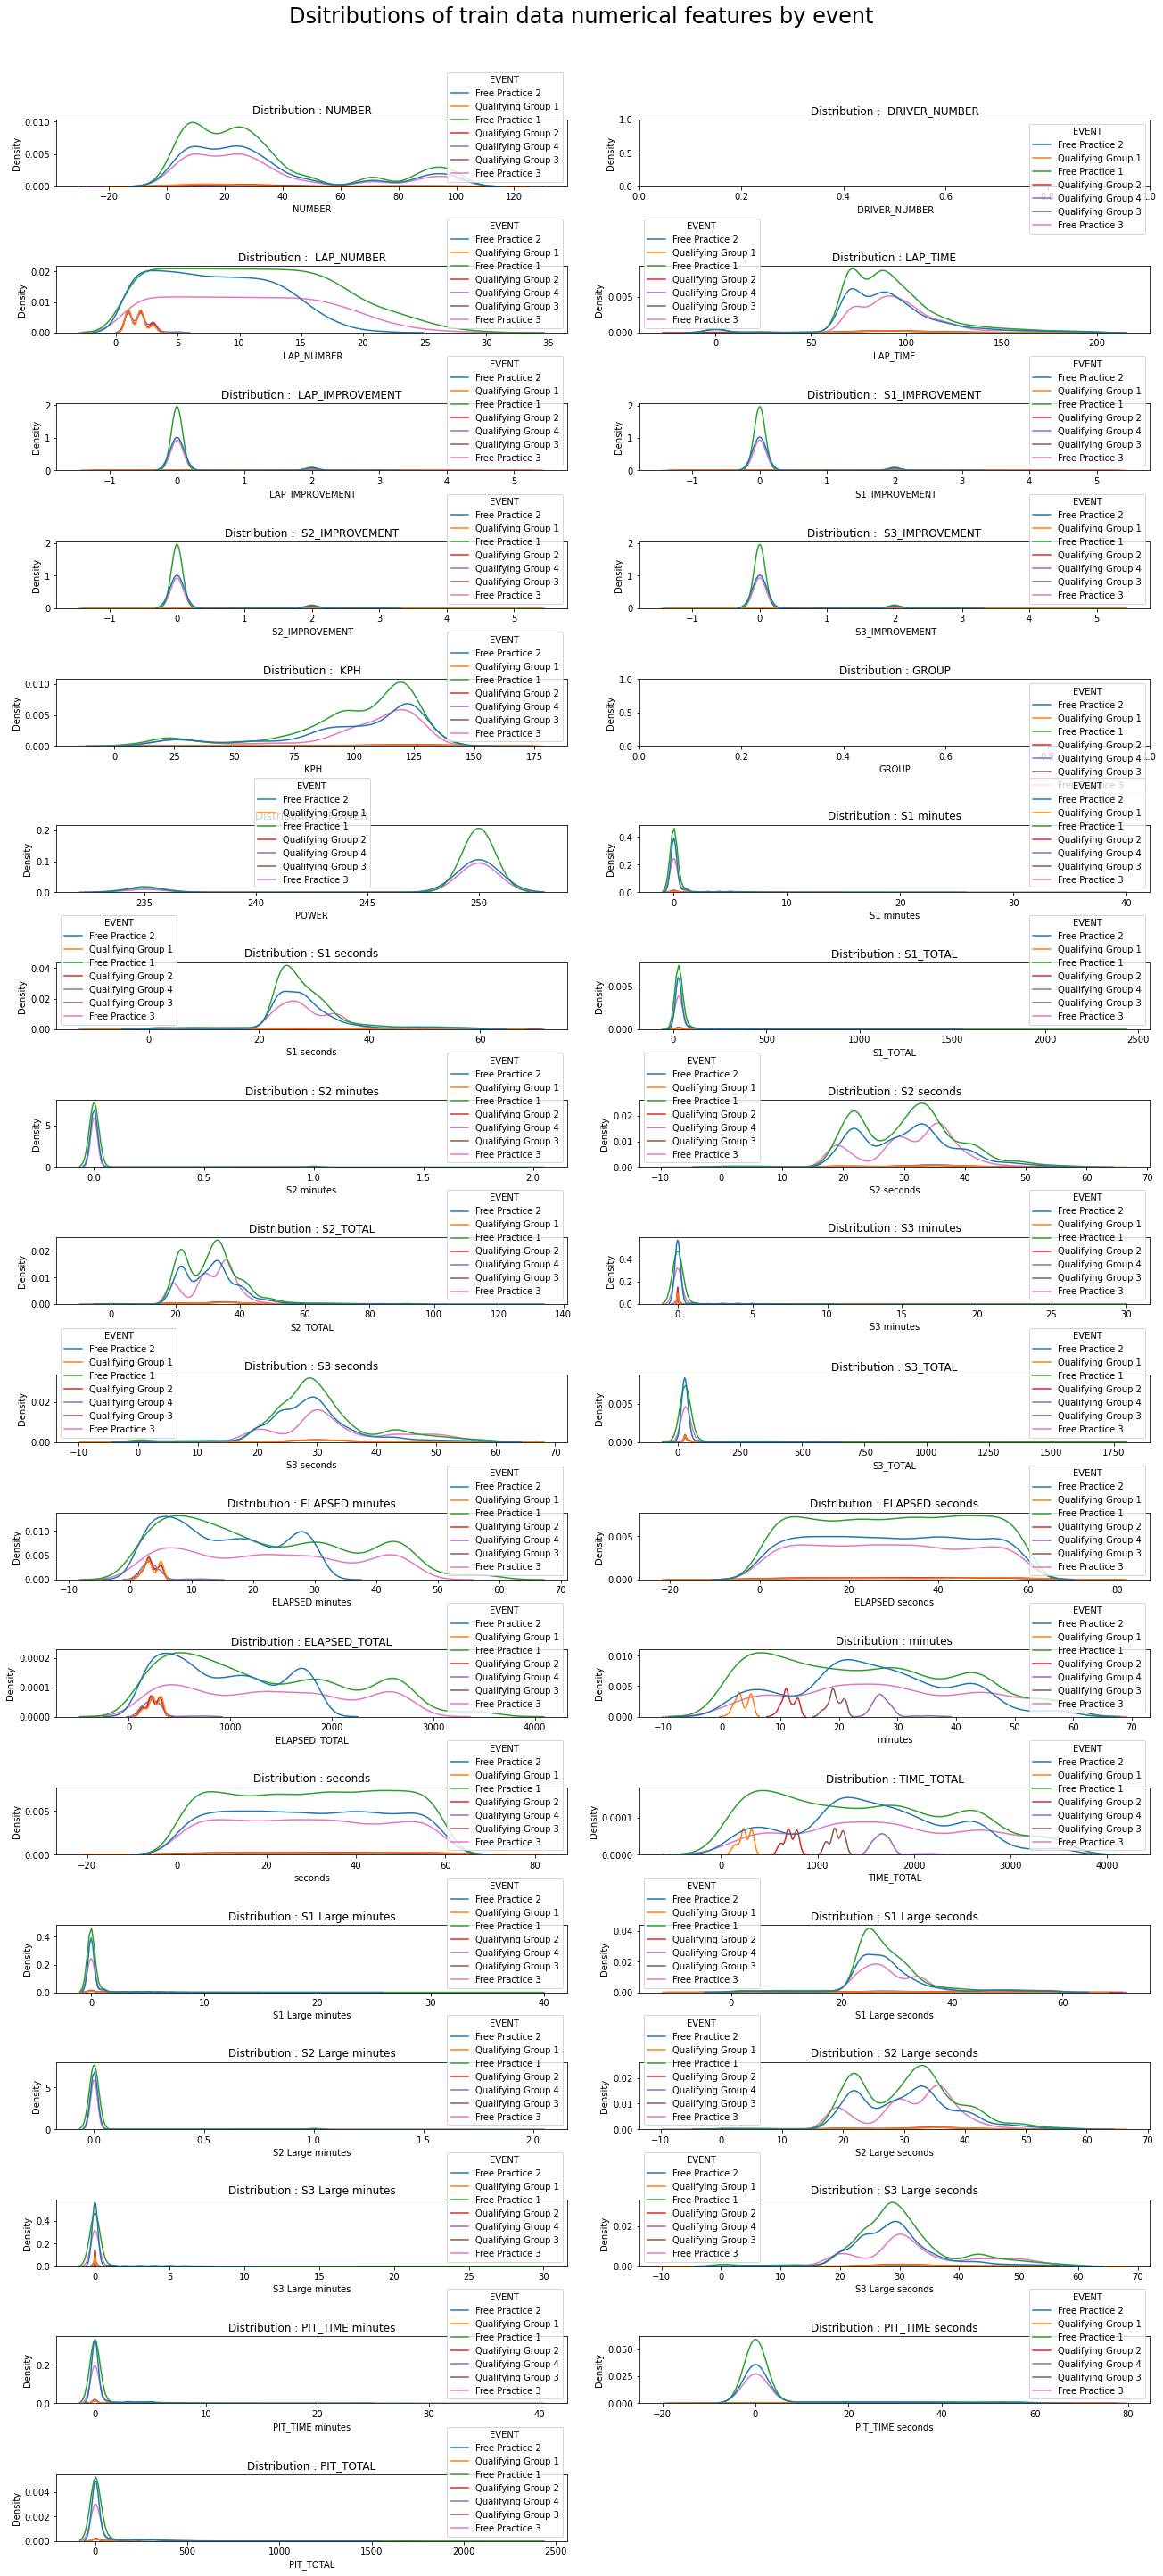

In [25]:
eda.kde_plot(list(cleaned_train_data.describe().columns),width=18,height=40,hue="EVENT",
             title="Dsitributions of train data numerical features by event")

### Univariate Analysis (Categorical Features)

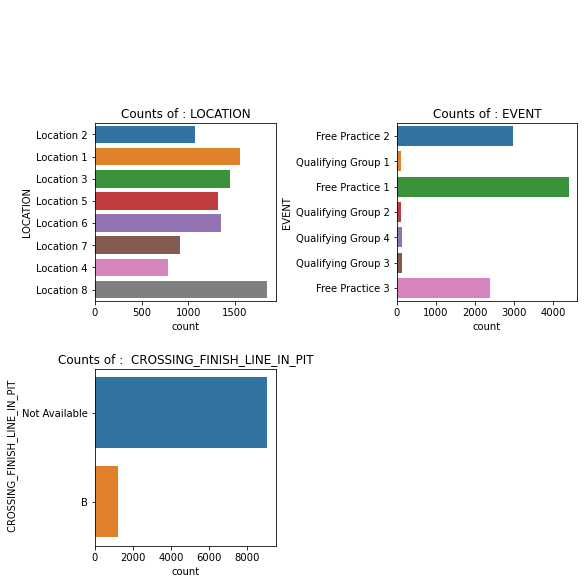

In [26]:
eda.count_plot(['LOCATION','EVENT',' CROSSING_FINISH_LINE_IN_PIT'],width=8,height=8)

<AxesSubplot:xlabel='TEAM', ylabel='count'>

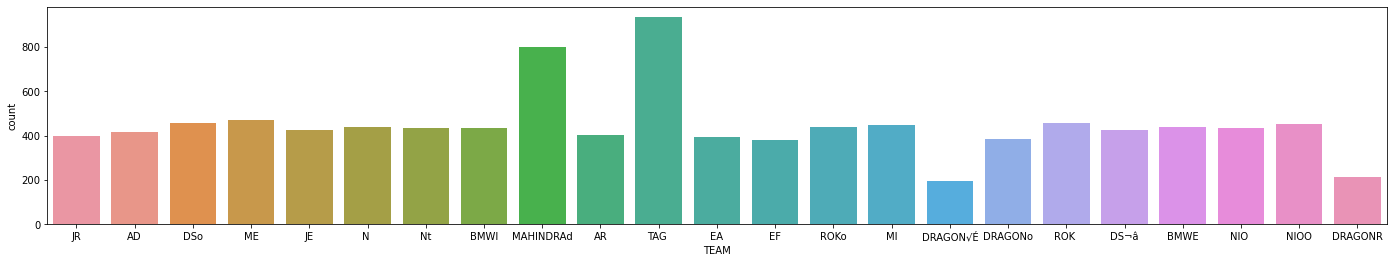

In [27]:
plt.figure(figsize=(24,4))
sns.countplot(cleaned_train_data['TEAM'])

<AxesSubplot:xlabel='DRIVER_NAME', ylabel='count'>

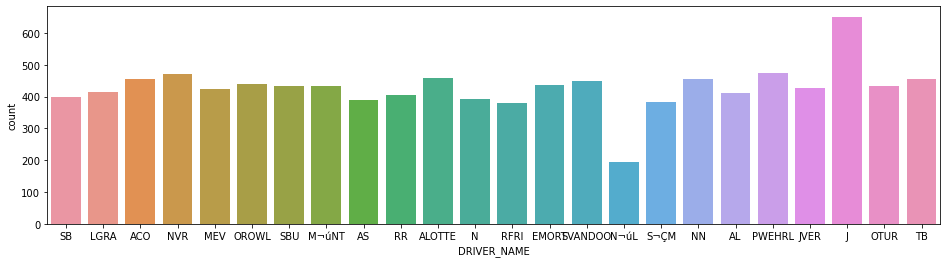

In [28]:
plt.figure(figsize=(16,4))
sns.countplot(cleaned_train_data['DRIVER_NAME'])

### Correlation Between Features

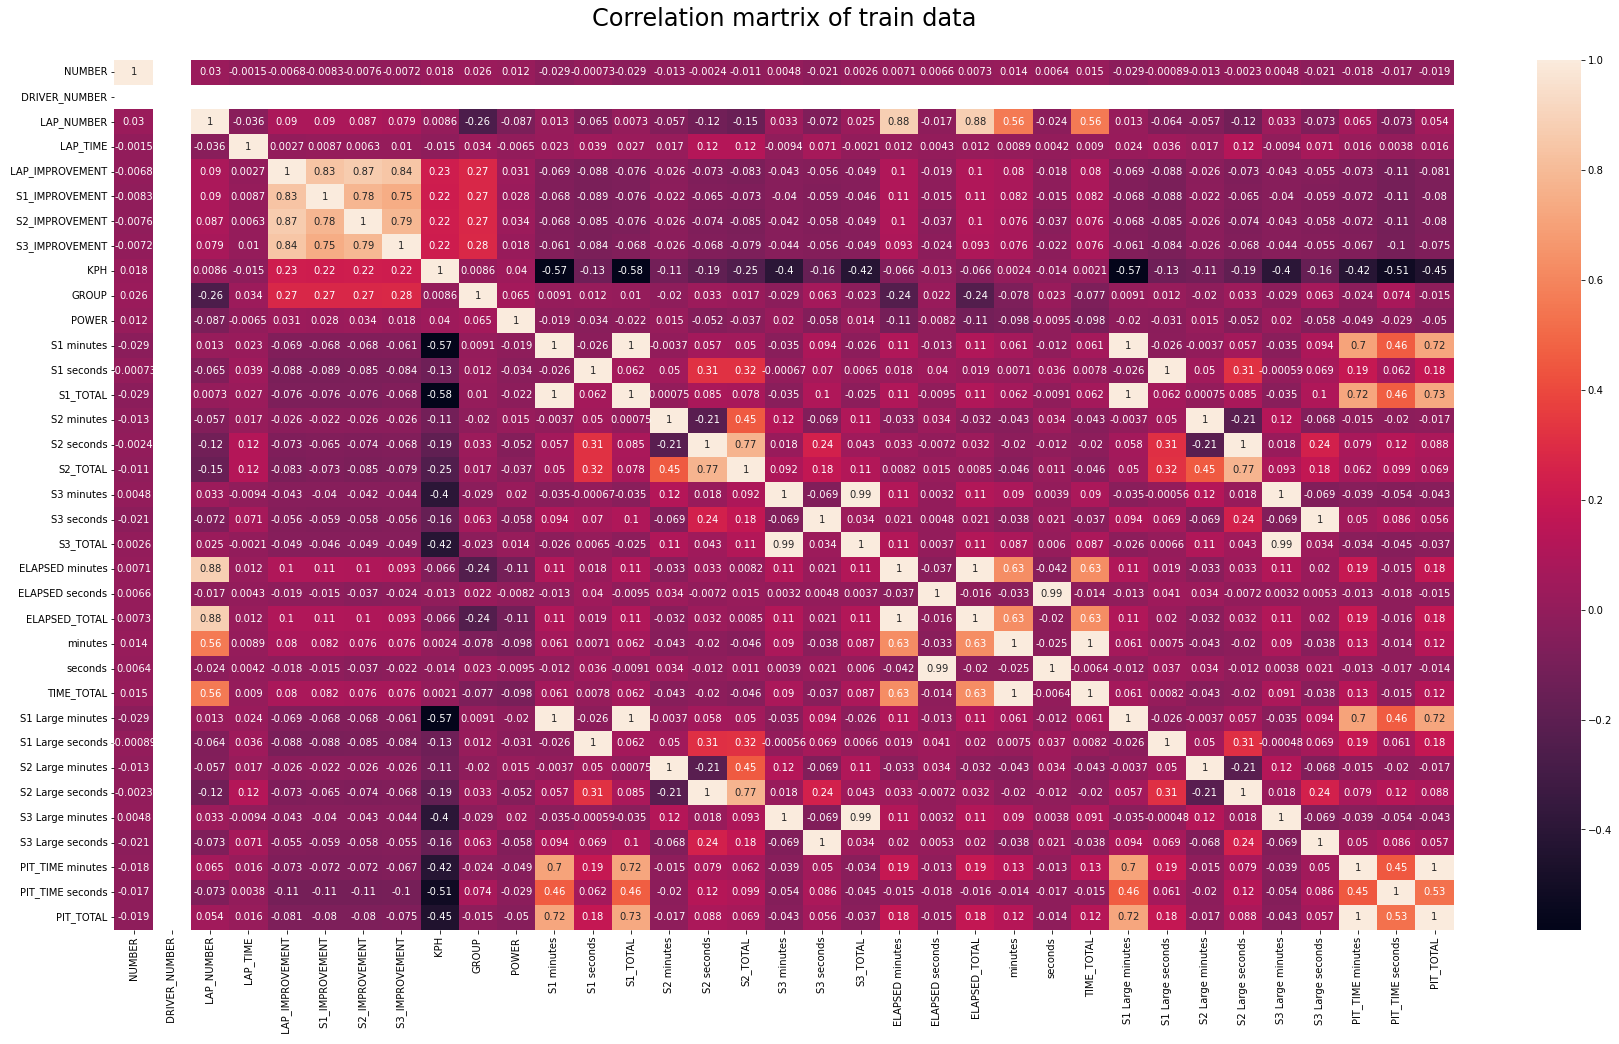

In [29]:
eda.correlation_plot(list(cleaned_train_data.describe().columns),width=30,
                     title="Correlation martrix of train data")

## Exploring the train weather data

**Initializng the object :**

In [30]:
eda = EDA(cleaned_train_weather_data)

### Univariate Analysis (Numerical Features)

**Plain distributions of numerical features :**

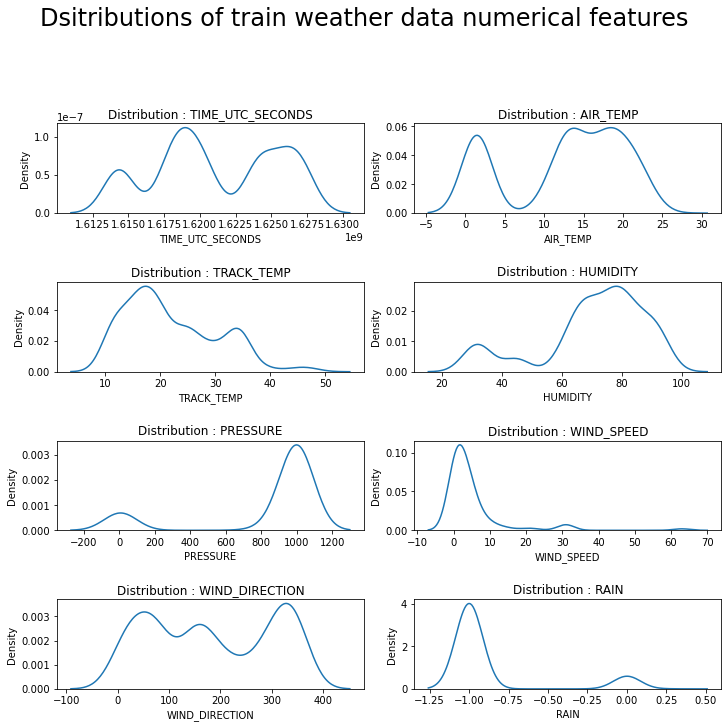

In [31]:
eda.kde_plot(list(cleaned_test_weather_data.describe().columns),width=10,height=10,
             title="Dsitributions of train weather data numerical features")

**Distributions of numerical features by event :**

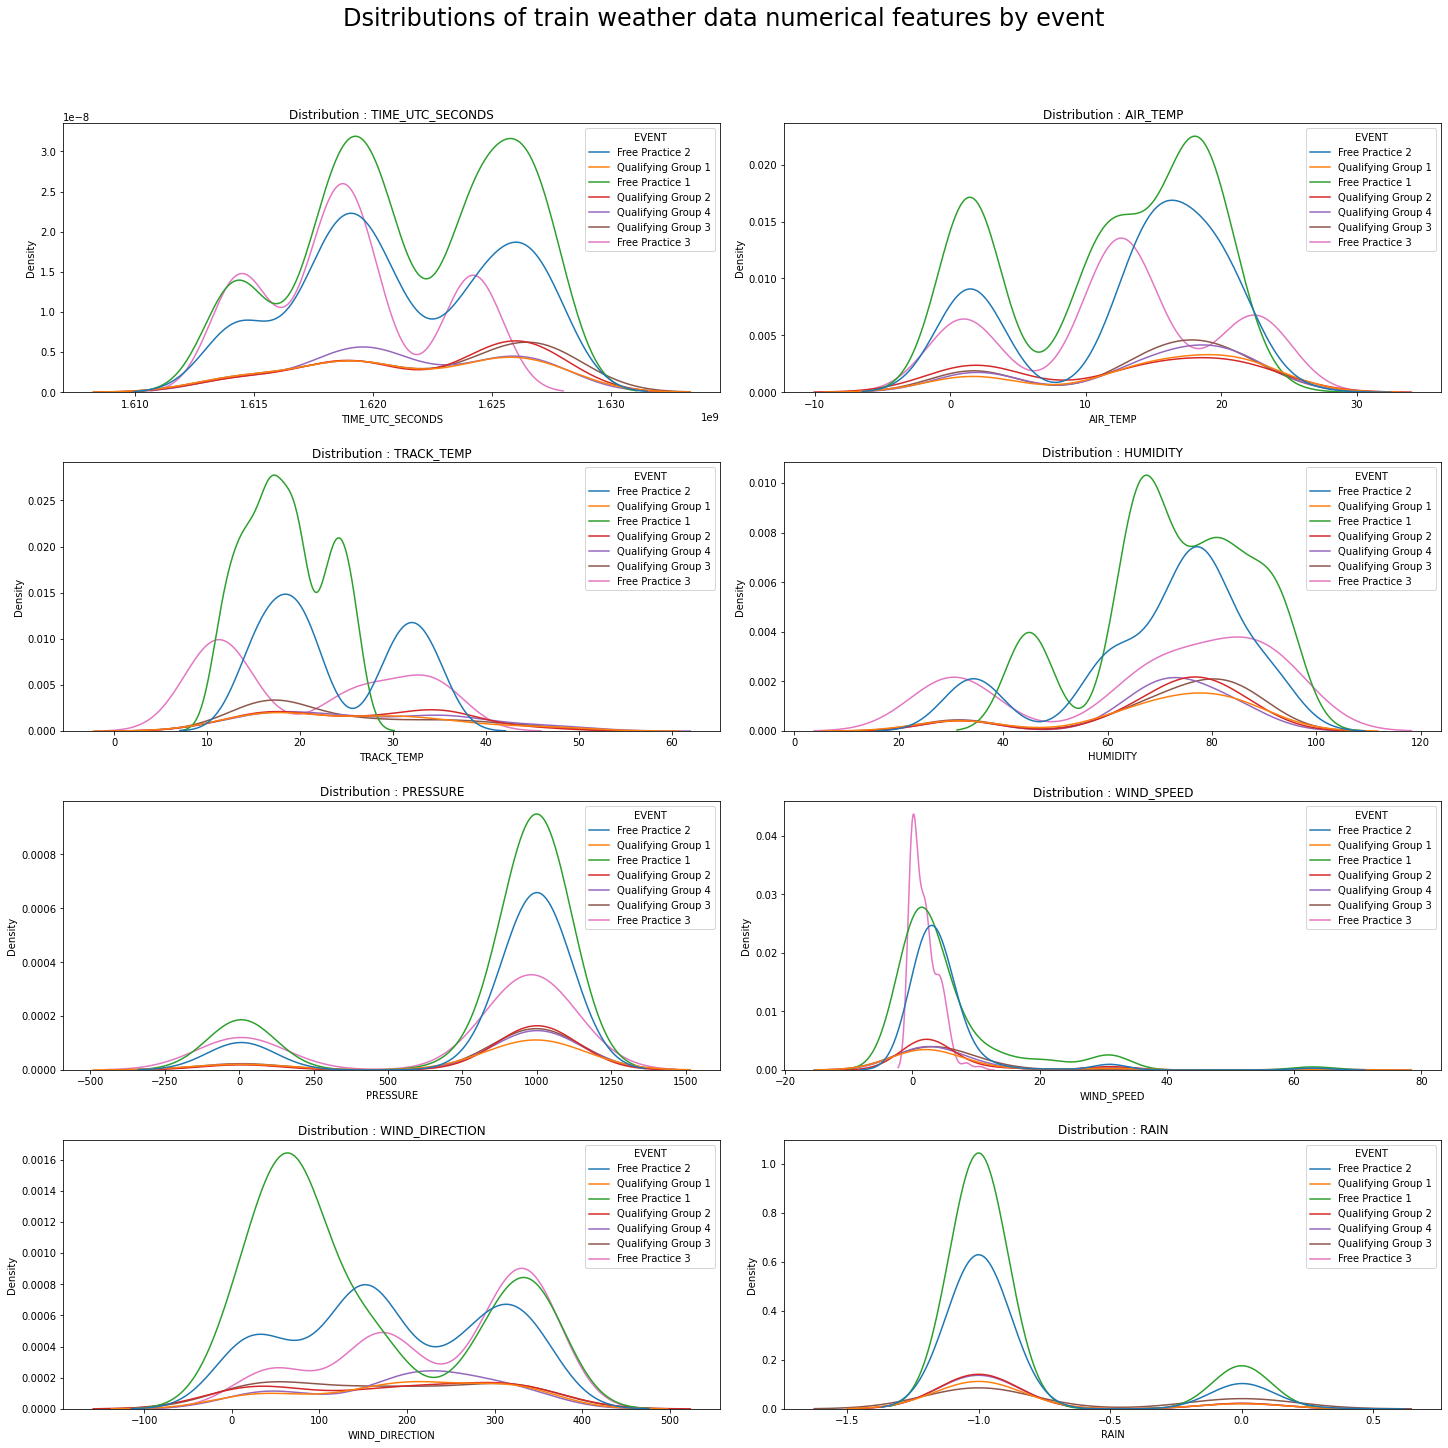

In [32]:
eda.kde_plot(list(cleaned_test_weather_data.describe().columns),width=20,height=20,hue="EVENT",
             title="Dsitributions of train weather data numerical features by event")

### Univariate Analysis (Categorical Features)

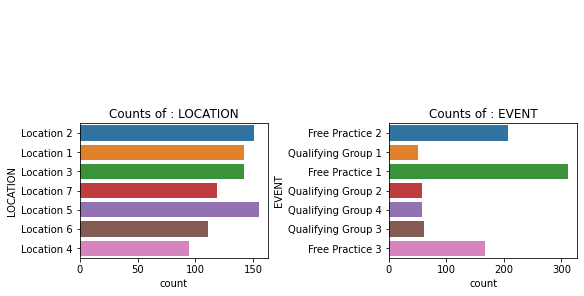

In [33]:
eda.count_plot(['LOCATION','EVENT'],width=8,height=4)

### Correlation Between Features

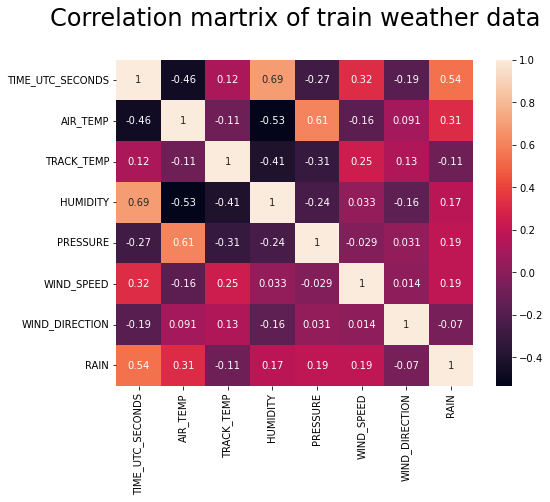

In [34]:
eda.correlation_plot(list(cleaned_train_weather_data.describe().columns),width=8,height=6,
                     title="Correlation martrix of train weather data")

# Generating distance feature & Predictive power

## Distance

**distance = velocity * time**

In [35]:
cleaned_train_data['Distance'] = cleaned_train_data['S1_TOTAL'] + cleaned_train_data['S2_TOTAL'] +  \
cleaned_train_data['S3_TOTAL']

cleaned_train_data['Distance'] = cleaned_train_data['Distance'] * (cleaned_train_data[' KPH']*5/18)

In [36]:
cleaned_test_data['Distance'] = cleaned_test_data['S1_TOTAL'] + cleaned_test_data['S2_TOTAL'] +  \
cleaned_test_data['S3_TOTAL']

cleaned_test_data['Distance'] = cleaned_test_data['Distance'] * (cleaned_test_data[' KPH']*5/18)

## Training a Decision tree on normal data

In [37]:
dt1 = DecisionTreeRegressor()
dt1.fit(cleaned_train_data[[' DRIVER_NUMBER', ' LAP_NUMBER',
       ' LAP_IMPROVEMENT', ' S1_IMPROVEMENT', ' S2_IMPROVEMENT',
       ' S3_IMPROVEMENT', ' KPH', 'GROUP', 'POWER', 'S1 minutes', 'S1 seconds',
       'S1_TOTAL', 'S2 minutes', 'S2 seconds', 'S2_TOTAL', 'S3 minutes',
       'S3 seconds', 'S3_TOTAL', 'ELAPSED minutes', 'ELAPSED seconds',
       'ELAPSED_TOTAL', 'minutes', 'seconds', 'TIME_TOTAL', 'S1 Large minutes',
       'S1 Large seconds', 'S2 Large minutes', 'S2 Large seconds',
       'S3 Large minutes', 'S3 Large seconds', 'PIT_TIME minutes',
       'PIT_TIME seconds', 'PIT_TOTAL','Distance']]
        ,cleaned_train_data['LAP_TIME'])

DecisionTreeRegressor()

<AxesSubplot:>

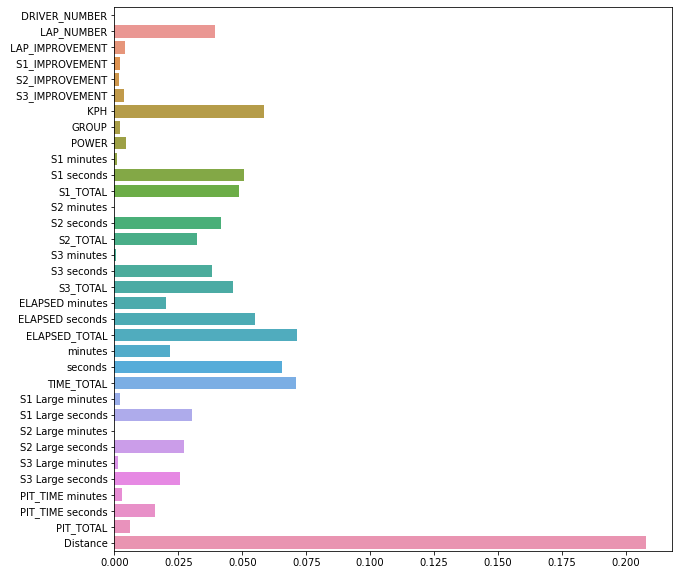

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(y = dt1.feature_names_in_, x = dt1.feature_importances_)

In [39]:
with open('pp.txt','w') as file:
    file.write(tree.export_text(dt1,feature_names=list(dt1.feature_names_in_)))

# Preparing data for modelling

## Combining normal and weather data

**based on event (median) :**

In [40]:
cleaned_train_weather_data.groupby(['EVENT']).median().reset_index().drop(['TIME_UTC_SECONDS','RAIN'],axis=1)

,EVENT,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION
0,Free Practice 1,13.0000,18.0,72.0,1011.000,2.00000,84.0
1,Free Practice 2,15.0556,20.9,76.0,1007.000,3.18280,160.0
2,Free Practice 3,12.6667,18.2,74.5,965.104,1.06093,293.0
3,Qualifying Group 1,15.1667,25.0,76.0,1006.000,2.12187,209.0
4,Qualifying Group 2,14.4722,27.4,76.0,1012.000,2.12187,191.5
5,Qualifying Group 3,18.0000,19.0,76.0,1008.000,3.18280,163.0
6,Qualifying Group 4,18.0000,26.1,72.0,1008.000,2.12187,218.0


In [41]:
train_weather_data_median = \
cleaned_train_weather_data.groupby(['EVENT']).median().reset_index().drop(['TIME_UTC_SECONDS','RAIN'],axis=1)

In [42]:
print("Before Merging :\n")
print("train data          :", cleaned_train_data.shape)
print("train weather data  :", train_weather_data_median.shape)

Before Merging :

train data          : (10276, 50)
train weather data  : (7, 7)


In [43]:
train_data_combined = pd.merge(cleaned_train_data,train_weather_data_median,on=['EVENT'])

In [44]:
print("After Merging :\n")
print("train data          :", train_data_combined.shape)

After Merging :

train data          : (10276, 56)


## Dropping unnecessary columns

In [45]:
train_data_combined = train_data_combined.drop(['NUMBER',' S1',' S2',' S3','S1 minutes', 'S1 seconds',
                                                'S2 minutes', 'S2 seconds','S3 minutes', 'S3 seconds',
                                                'ELAPSED minutes', 'ELAPSED seconds','minutes','seconds',
                                                ' S1_IMPROVEMENT',' S2_IMPROVEMENT',' S3_IMPROVEMENT',
                                                ' ELAPSED',' HOUR','S1_LARGE','S2_LARGE','S3_LARGE',
                                                'S1 Large minutes', 'S1 Large seconds','S2 Large minutes', 
                                                'S2 Large seconds', 'S3 Large minutes','S3 Large seconds',
                                                'PIT_TIME minutes', 'PIT_TIME seconds',
                                                'PIT_TIME','LOCATION'],axis=1)

In [46]:
train_data_combined.shape

(10276, 24)

## Dividing the data into X and Y

In [47]:
x = train_data_combined.drop(['LAP_TIME'],axis=1)
y = train_data_combined['LAP_TIME']

## Dividing X,Y into train ,CV sets

In [48]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
print("Item    : Shape")
print("########################")
print("x_train : {0}".format(x_train.shape))
print(".........................")
print("y_train : {0}".format(y_train.shape))
print(".........................")
print("x_cv    : {0}".format(x_cv.shape))
print(".........................")
print("y_cv    : {0}".format(y_cv.shape))

Item    : Shape
########################
x_train : (8220, 23)
.........................
y_train : (8220,)
.........................
x_cv    : (2056, 23)
.........................
y_cv    : (2056,)


## Preparing the test set

In [50]:
cleaned_test_data['EVENT'].value_counts()

Qualifying Group 2    113
Qualifying Group 3    110
Qualifying Group 4     99
Qualifying Group 1     98
Name: EVENT, dtype: int64

In [51]:
cleaned_test_weather_data['EVENTS'].value_counts()

Free Practice 1       75
Free Practice 2       60
Qualifying Group 1     8
Qualifying Group 2     8
Qualifying Group 4     8
Qualifying Group 3     8
Name: EVENTS, dtype: int64

`Free Practice events in test data is not available`

In [52]:
test_weather_data_median = cleaned_test_weather_data[(cleaned_test_weather_data['EVENTS']!='Free Practice 1') &
(cleaned_test_weather_data['EVENTS']!='Free Practice 2') & 
(cleaned_test_weather_data['EVENTS']!='Free Practice 3')].groupby(['EVENTS']).median()\
.reset_index().drop(['TIME_UTC_SECONDS','RAIN'],axis=1)

In [53]:
test_weather_data_median = test_weather_data_median.rename(columns={'EVENTS':'EVENT'})

In [54]:
test_weather_data_median

,EVENT,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION
0,Qualifying Group 1,23.0,33.5,50.5,1013.0,4.0,202.0
1,Qualifying Group 2,23.0,33.5,49.0,1013.0,6.0,210.5
2,Qualifying Group 3,23.5,34.0,48.5,1013.0,5.5,214.5
3,Qualifying Group 4,23.5,33.5,48.5,1013.0,8.0,205.5


`Combining test normal and weather data`

In [55]:
test_data_combined = pd.merge(cleaned_test_data,test_weather_data_median)

In [56]:
test_data_combined = test_data_combined.drop(['NUMBER',' S1',' S2',' S3','S1 minutes', 'S1 seconds',
                                                'S2 minutes', 'S2 seconds','S3 minutes', 'S3 seconds',
                                                'ELAPSED minutes', 'ELAPSED seconds','minutes','seconds',
                                                ' S1_IMPROVEMENT',' S2_IMPROVEMENT',' S3_IMPROVEMENT',
                                                ' ELAPSED',' HOUR','S1_LARGE','S2_LARGE','S3_LARGE',
                                                'S1 Large minutes', 'S1 Large seconds','S2 Large minutes', 
                                                'S2 Large seconds', 'S3 Large minutes','S3 Large seconds',
                                                'PIT_TIME minutes', 'PIT_TIME seconds',
                                                'PIT_TIME','LOCATION','LAP_TIME'],axis=1)

In [57]:
test_data_combined.shape

(420, 23)

# Featurization & Encoding

## Initializing object

In [58]:
f1 = Featurizer(x_train = x_train, x_holdout = x_cv, x_test = test_data_combined)

## Transforming

In [59]:
#numerical =[' KPH','POWER','PRESSURE','HUMIDITY','AIR_TEMP','TRACK_TEMP','WIND_DIRECTION']
categorical = [' CROSSING_FINISH_LINE_IN_PIT','TEAM','EVENT','DRIVER_NAME']

In [60]:
x_train_final,x_test_final,x_cv_final = f1.featurize(numerical = [] , categorical = categorical)

`WELL scipy.sparse.hstack() was not working, well still need a lot of work to do there.`<br>
`So manually stacking them below, For this i commented out 122 line in the featurize.py`

In [61]:
x_train_final = np.hstack(x_train_final)
x_test_final = np.hstack(x_test_final)
x_cv_final = np.hstack(x_cv_final)

In [62]:
print("Item    : Shape")
print("########################")
print("x_train : {0}".format(x_train_final.shape))
print(".........................")
print("y_train : {0}".format(y_train.shape))
print(".........................")
print("x_cv    : {0}".format(x_cv_final.shape))
print(".........................")
print("y_cv    : {0}".format(y_cv.shape))
print(".........................")
print("x_test  : {0}".format(x_test_final.shape))
print(".........................")

Item    : Shape
########################
x_train : (8220, 72)
.........................
y_train : (8220,)
.........................
x_cv    : (2056, 72)
.........................
y_cv    : (2056,)
.........................
x_test  : (420, 72)
.........................


In [63]:
if not os.path.isfile('Final_data/'):
    os.mkdir('Final_data')
    
    temp = pd.DataFrame(x_train_final)
    temp['target'] = y_train.values
    temp.to_csv('Final_data/final_train.csv',index=False)
    
    temp = pd.DataFrame(x_cv_final)
    temp['target'] = y_cv.values
    temp.to_csv('Final_data/final_cv.csv',index=False)
    
    temp = pd.DataFrame(x_test_final)
    temp.to_csv('Final_data/final_test.csv',index=False)

In [8]:
final_train = pd.read_csv('Final_data/final_train.csv')
final_cv = pd.read_csv('Final_data/final_cv.csv')
final_test = pd.read_csv('Final_data/final_test.csv')

# Modelling

## RMSLE

In [9]:
def root_mean_squared_log_error(y_true, y_pred):
        return np.sqrt(mean_squared_log_error(y_true,y_pred))

## XGB - Config1

In [17]:
xgbr = xgb.XGBRegressor(n_jobs=-1,n_estimators=500,tree_method="gpu_hist",
                        predictor="gpu_predictor",seed=42)

In [18]:
evaluation = [( final_train.drop(['target'],axis=1), final_train['target']), 
                  ( final_cv.drop(['target'],axis=1), final_cv['target'])]

In [19]:
xgbr.fit(final_train.drop(['target'],axis=1), final_train['target'],
eval_set=evaluation, eval_metric="rmsle", 
early_stopping_rounds=20)
#verbose=False)

[0]	validation_0-rmsle:1.22375	validation_1-rmsle:1.23794
[1]	validation_0-rmsle:0.79932	validation_1-rmsle:0.82410
[2]	validation_0-rmsle:0.63997	validation_1-rmsle:0.66802
[3]	validation_0-rmsle:0.57573	validation_1-rmsle:0.60850
[4]	validation_0-rmsle:0.55016	validation_1-rmsle:0.57905
[5]	validation_0-rmsle:0.54044	validation_1-rmsle:0.56971
[6]	validation_0-rmsle:0.53725	validation_1-rmsle:0.56711
[7]	validation_0-rmsle:0.53551	validation_1-rmsle:0.56669
[8]	validation_0-rmsle:0.53573	validation_1-rmsle:0.56680
[9]	validation_0-rmsle:0.53442	validation_1-rmsle:0.56787
[10]	validation_0-rmsle:0.53502	validation_1-rmsle:0.56866
[11]	validation_0-rmsle:0.53461	validation_1-rmsle:0.56922
[12]	validation_0-rmsle:0.53466	validation_1-rmsle:0.56974
[13]	validation_0-rmsle:0.53431	validation_1-rmsle:0.57018
[14]	validation_0-rmsle:0.53408	validation_1-rmsle:0.57015
[15]	validation_0-rmsle:0.53364	validation_1-rmsle:0.57057
[16]	validation_0-rmsle:0.53218	validation_1-rmsle:0.57060
[17]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             predictor='gpu_predictor', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [20]:
root_mean_squared_log_error(final_train['target'],xgbr.predict(final_train.drop(['target'],axis=1)))

0.5355086715738926

In [21]:
root_mean_squared_log_error(final_cv['target'],xgbr.predict(final_cv.drop(['target'],axis=1)))

0.5666899785370824

In [ ]:
xgb_submission = pd.DataFrame({"LAP_TIME" :abs(xgbr.predict(final_test))})

In [ ]:
xgb_submission.to_csv("xgbr1.csv",index=False)

## XGB - Config2

In [23]:
xgbr = xgb.XGBRegressor(n_jobs=-1,n_estimators=1000,tree_method="gpu_hist",
                        predictor="gpu_predictor",seed=42)

In [24]:
evaluation = [( final_train.drop(['target'],axis=1), np.log(final_train['target'] + 1).values.reshape(-1,1)), 
                  ( final_cv.drop(['target'],axis=1), np.log(final_cv['target'] + 1).values.reshape(-1,1))]

In [25]:
xgbr.fit(final_train.drop(['target'],axis=1), np.log(final_train['target'] + 1).values.reshape(-1,1),
eval_set=evaluation, eval_metric="rmsle",
early_stopping_rounds=30,)
#verbose=False)

[0]	validation_0-rmsle:0.72347	validation_1-rmsle:0.72428
[1]	validation_0-rmsle:0.46942	validation_1-rmsle:0.47083
[2]	validation_0-rmsle:0.33576	validation_1-rmsle:0.33827
[3]	validation_0-rmsle:0.26349	validation_1-rmsle:0.26781
[4]	validation_0-rmsle:0.22443	validation_1-rmsle:0.23143
[5]	validation_0-rmsle:0.20353	validation_1-rmsle:0.21364
[6]	validation_0-rmsle:0.19229	validation_1-rmsle:0.20541
[7]	validation_0-rmsle:0.18778	validation_1-rmsle:0.20175
[8]	validation_0-rmsle:0.18499	validation_1-rmsle:0.20048
[9]	validation_0-rmsle:0.18402	validation_1-rmsle:0.19994
[10]	validation_0-rmsle:0.18283	validation_1-rmsle:0.19989
[11]	validation_0-rmsle:0.18196	validation_1-rmsle:0.19991
[12]	validation_0-rmsle:0.18096	validation_1-rmsle:0.20000
[13]	validation_0-rmsle:0.17997	validation_1-rmsle:0.20006
[14]	validation_0-rmsle:0.17799	validation_1-rmsle:0.19981
[15]	validation_0-rmsle:0.17699	validation_1-rmsle:0.20030
[16]	validation_0-rmsle:0.17596	validation_1-rmsle:0.20029
[17]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
             predictor='gpu_predictor', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [26]:
root_mean_squared_log_error(final_train['target'],
                            np.exp(xgbr.predict(final_train.drop(['target'],axis=1)))-1)

0.4741558736462166

In [27]:
root_mean_squared_log_error(final_cv['target'],xgbr.predict(final_cv.drop(['target'],axis=1)))

2.829691260574427

In [ ]:
xgb_submission = pd.DataFrame({"LAP_TIME" :abs(xgbr.predict(final_test))})

In [ ]:
xgb_submission.to_csv("xgbr2.csv",index=False)

## Neural network

In [28]:
# https://stackoverflow.com/questions/43855162/rmse-rmsle-loss-function-in-keras
def root_mean_squared_log_error_K(y_true, y_pred):
    return K.sqrt(K.mean(K.square(K.log(1+y_pred) - K.log(1+y_true))))

In [29]:
tf.random.set_seed(42)

In [30]:
tf.keras.backend.clear_session()

In [31]:
model = Sequential()

model.add(Dense(128, activation='relu',input_dim = final_train.drop(['target'],axis=1).shape[1]))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1,))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               9344      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [32]:
model.compile(
    loss = 'mae', 
    optimizer="adam", 
    metrics=['mse',root_mean_squared_log_error_K])

In [33]:
history = model.fit(
    x = final_train.drop(['target'],axis=1),
    y = final_train['target'], batch_size = 16,
    validation_data = (final_cv.drop(['target'],axis=1),final_cv['target']),
    epochs=10
)

Epoch 1/10
514/514 [==============================] - 4s 4ms/step - loss: 57.8673 - mse: 5636.3728 - root_mean_squared_log_error_K: nan - val_loss: 58.6863 - val_mse: 4047.5371 - val_root_mean_squared_log_error_K: 1.0379
Epoch 2/10
514/514 [==============================] - 2s 3ms/step - loss: 40.1773 - mse: 2507.8919 - root_mean_squared_log_error_K: nan - val_loss: 54.2365 - val_mse: 3531.8025 - val_root_mean_squared_log_error_K: 0.9321
Epoch 3/10
514/514 [==============================] - 2s 3ms/step - loss: 37.3923 - mse: 2239.1054 - root_mean_squared_log_error_K: nan - val_loss: 56.0876 - val_mse: 3742.2014 - val_root_mean_squared_log_error_K: 0.9729
Epoch 4/10
514/514 [==============================] - 2s 3ms/step - loss: 36.9055 - mse: 2196.7436 - root_mean_squared_log_error_K: 0.8392 - val_loss: 54.2637 - val_mse: 3533.6179 - val_root_mean_squared_log_error_K: 0.9309
Epoch 5/10
514/514 [==============================] - 2s 4ms/step - loss: 34.8617 - mse: 1956.7970 - root_mean_sq

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


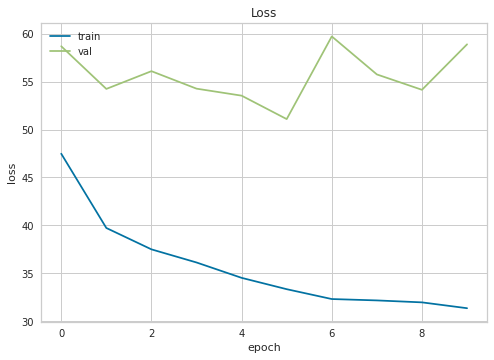

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

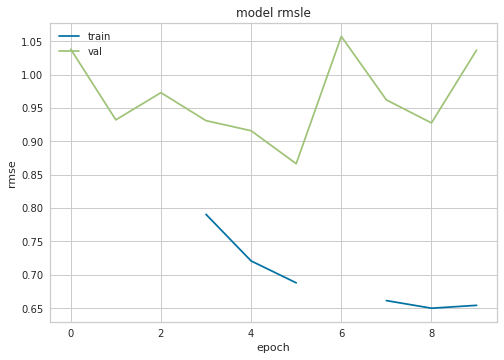

In [35]:
plt.plot(history.history['root_mean_squared_log_error_K'])
plt.plot(history.history['val_root_mean_squared_log_error_K'])
plt.title('model rmsle')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Trying out pycaret

In [36]:
reg1 = setup(data = final_train, target = 'target' , preprocess = False,
            use_gpu = True , test_data = final_cv , session_id = 42)
best = compare_models(sort = 'RMSLE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17.1305,612.9593,24.7304,0.0905,0.5570,0.1775,2.1760
rf,Random Forest Regressor,18.1150,656.1216,25.5887,0.0259,0.5606,0.1894,3.4750
ada,AdaBoost Regressor,18.0983,628.0002,25.0380,0.0669,0.5607,0.1954,1.9630
huber,Huber Regressor,17.8223,673.3141,25.9154,0.0017,0.5686,0.1796,0.5700
et,Extra Trees Regressor,19.2618,727.3399,26.9484,-0.0811,0.5688,0.2018,3.0200
knn,K Neighbors Regressor,19.4121,731.4306,27.0167,-0.0857,0.5702,0.2043,0.3370
lr,Linear Regression,18.0884,660.6728,25.6774,0.0195,0.5720,0.1890,0.1220
ridge,Ridge Regression,18.0882,660.6619,25.6771,0.0195,0.5720,0.1890,0.1430
omp,Orthogonal Matching Pursuit,18.0771,660.5472,25.6723,0.0201,0.5721,0.1890,0.0910
lasso,Lasso Regression,18.0597,659.9518,25.6603,0.0211,0.5722,0.1889,0.1330


In [37]:
best_model = tune_model(best ,optimize = 'RMSLE',n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17.5164,639.4019,25.2864,0.1053,0.5325,0.1730
1,17.5700,648.3123,25.4620,0.0906,0.6856,0.1705
2,17.3576,628.5803,25.0715,0.1160,0.5634,0.1832
3,18.0875,667.5394,25.8368,0.0358,0.4738,0.1867
4,16.6387,578.2183,24.0462,0.0785,0.5034,0.2008
5,18.3148,687.1918,26.2143,0.1076,0.6536,0.1786
6,15.8349,525.6983,22.9281,0.0843,0.4848,0.1677
7,16.3627,554.2783,23.5431,0.1088,0.5877,0.1615
8,16.2807,533.9828,23.1081,0.0862,0.4663,0.1807
9,17.6739,670.7220,25.8983,0.0845,0.6197,0.1768


In [38]:
best_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.4, loss='ls', max_depth=1,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.4, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=130,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
grb_submission = pd.DataFrame({"LAP_TIME" :best_model.predict(final_test)})
grb_submission.to_csv("grb.csv",index=False)

## Stacking top 3 models : Giving complexity a swing

In [ ]:
# top5 = compare_models(n_select = 5 , optimize = 'RMSLE', meta_model = 'gbr')
# stacker = stack_models(top5)
gbr = create_model(estimator = 'gbr')
rf = create_model(estimator = 'rf')
et = create_model(estimator = 'et')
ada = create_model(estimator = 'ada')
huber = create_model(estimator = 'huber')

In [40]:
top3 = compare_models(n_select = 3 , sort= 'RMSLE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17.1305,612.9593,24.7304,0.0905,0.5570,0.1775,2.1800
rf,Random Forest Regressor,18.1150,656.1216,25.5887,0.0259,0.5606,0.1894,3.5550
ada,AdaBoost Regressor,18.0983,628.0002,25.0380,0.0669,0.5607,0.1954,1.9890
huber,Huber Regressor,17.8223,673.3141,25.9154,0.0017,0.5686,0.1796,0.5800
et,Extra Trees Regressor,19.2618,727.3399,26.9484,-0.0811,0.5688,0.2018,3.0620
knn,K Neighbors Regressor,19.4121,731.4306,27.0167,-0.0857,0.5702,0.2043,0.2150
lr,Linear Regression,18.0884,660.6728,25.6774,0.0195,0.5720,0.1890,0.1220
ridge,Ridge Regression,18.0882,660.6619,25.6771,0.0195,0.5720,0.1890,0.0920
omp,Orthogonal Matching Pursuit,18.0771,660.5472,25.6723,0.0201,0.5721,0.1890,0.1020
lasso,Lasso Regression,18.0597,659.9518,25.6603,0.0211,0.5722,0.1889,0.1330


In [41]:
top3

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_spl

In [43]:
tuned_top3 = []

for i in top3:
    tuned_top3.append(tune_model(i ,optimize = 'RMSLE',n_iter = 5)) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18.2669,636.6738,25.2324,0.1091,0.5332,0.1880
1,18.9894,689.8706,26.2654,0.0323,0.6971,0.1932
2,18.0645,638.6464,25.2715,0.1018,0.5673,0.1984
3,19.0738,680.2577,26.0817,0.0174,0.4781,0.2048
4,17.6260,601.0620,24.5166,0.0421,0.5087,0.2180
5,18.6431,674.8036,25.9770,0.1237,0.6532,0.1890
6,16.8490,543.7153,23.3177,0.0529,0.4902,0.1862
7,17.5048,576.2179,24.0045,0.0736,0.5916,0.1805
8,17.2847,555.3886,23.5667,0.0496,0.4688,0.1994
9,18.2150,671.8698,25.9205,0.0829,0.6206,0.1880


In [44]:
tuned_top3

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.05, loss='ls', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0002, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.65, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=8, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_s

In [46]:
stacker = stack_models(tuned_top3 , optimize = 'RMSLE', meta_model = best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17.4243,638.5719,25.2700,0.1065,0.5314,0.1721
1,17.5472,654.1302,25.5760,0.0824,0.6880,0.1698
2,17.3718,629.6373,25.0926,0.1145,0.5619,0.1823
3,18.1342,656.5803,25.6238,0.0516,0.4731,0.1881
4,16.6183,579.2394,24.0674,0.0769,0.5041,0.1999
5,18.2630,685.9886,26.1914,0.1092,0.6531,0.1780
6,15.6861,523.2954,22.8757,0.0885,0.4848,0.1664
7,16.2649,551.2834,23.4794,0.1137,0.5855,0.1603
8,16.1148,527.5120,22.9676,0.0973,0.4667,0.1791
9,17.6350,674.7490,25.9759,0.0790,0.6209,0.1764


In [48]:
grb_submission = pd.DataFrame({"LAP_TIME" :stacker.predict(final_test)})
grb_submission.to_csv("stacker.csv",index=False)